In [1]:
import numpy as np
import pandas as pd

### 데이터 불러오기

In [2]:
train  = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')

train = train.drop(['index'],axis = 1)
test =test.drop(['index'],axis = 1)

### 데이터 전처리(나이)

In [3]:
train.loc[train['age'] == 0, 'age'] = train['age'].mean()
test.loc[test['age'] == 0, 'age'] = train['age'].mean()

In [4]:
train.loc[train['age'] > 65, 'age'] = 0
test.loc[test['age'] > 65, 'age'] = 0

### 데이터 전처리(가족 수)

In [5]:
train.loc[train['familysize'] > 6, 'familysize'] = train['familysize'].mode()[0]
test.loc[test['familysize'] > 6, 'familysize'] = train['familysize'].mode()[0]

### 파라미터 값 조정(원 핫 인코딩)

In [6]:
for name in ['education', 'urban', 'gender', 'engnat', 'hand', 'religion',
            'voted', 'married']:

    mergedata = pd.get_dummies(train[name], prefix = name)
    train = pd.concat([train, mergedata], axis=1)
    train = train.drop([name], axis = 1)

In [7]:
for name in ['education', 'urban', 'gender', 'engnat', 'hand', 'religion',
            'voted', 'married']:

    mergedata = pd.get_dummies(test[name], prefix = name)
    test = pd.concat([test, mergedata], axis=1)
    test = test.drop([name], axis = 1)

### 데이터 전처리(나라 - 라벨인코딩)

In [8]:
from sklearn.preprocessing import LabelEncoder
ex = LabelEncoder()

con8 = train.country.value_counts().keys()[:6]

for i in range(train.count().max()):
    if(train.country.values[i] not in con8):
        train.country.values[i] = "X"

for i in range(test.count().max()):
    if(test.country.values[i] not in con8):
        test.country.values[i] = "X"

train.country = ex.fit_transform(train.country)

test.country = ex.fit_transform(test.country)

### pycaret 모델 학습

### setting

In [9]:
from pycaret.classification import *

model = setup(data = train, target = 'nerdiness',use_gpu=True,session_id=2023, normalize = True, normalize_method = 'zscore',transformation=True,train_size=0.85)

,Description,Value
0,session_id,2023
1,Target,nerdiness
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15000, 94)"
5,Missing Values,True
6,Numeric Features,38
7,Categorical Features,55
8,Ordinal Features,False
9,High Cardinality Features,False


### 모델 비교

In [10]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7822,0.8723,0.8425,0.7829,0.8115,0.5543,0.5566,0.7860
rf,Random Forest Classifier,0.7776,0.8672,0.8378,0.7794,0.8075,0.5449,0.5471,0.7000
xgboost,Extreme Gradient Boosting,0.7641,0.8304,0.8133,0.7744,0.7933,0.5189,0.5198,0.5640
catboost,CatBoost Classifier,0.7600,0.8333,0.8236,0.7640,0.7926,0.5088,0.5109,6.6080
lightgbm,Light Gradient Boosting Machine,0.7490,0.8215,0.8109,0.7561,0.7824,0.4867,0.4885,0.9330
gbc,Gradient Boosting Classifier,0.7330,0.8027,0.8022,0.7401,0.7698,0.4532,0.4553,5.6440
lr,Logistic Regression,0.7308,0.7989,0.7899,0.7431,0.7657,0.4501,0.4513,1.1980
ridge,Ridge Classifier,0.7298,0.0000,0.7939,0.7400,0.7659,0.4473,0.4489,0.0730
lda,Linear Discriminant Analysis,0.7293,0.7982,0.7933,0.7396,0.7655,0.4464,0.4480,0.4260
ada,Ada Boost Classifier,0.7232,0.7922,0.7812,0.7374,0.7586,0.4349,0.4359,1.8510


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=2023, verbose=0,
                     warm_start=False)

### 모델 생성

In [11]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7718,0.8647,0.8197,0.7812,0.8000,0.5346,0.5354
1,0.7906,0.8811,0.8324,0.7997,0.8157,0.5735,0.5741
2,0.7890,0.8840,0.8465,0.7898,0.8171,0.5685,0.5704
3,0.7843,0.8733,0.8380,0.7881,0.8123,0.5594,0.5609
4,0.7702,0.8669,0.8465,0.7656,0.8040,0.5280,0.5319
5,0.7686,0.8539,0.8268,0.7734,0.7992,0.5270,0.5286
6,0.7867,0.8656,0.8493,0.7852,0.8160,0.5632,0.5656
7,0.7733,0.8618,0.8392,0.7727,0.8046,0.5358,0.5384
8,0.7639,0.8567,0.8392,0.7609,0.7981,0.5155,0.5191


In [12]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7718,0.8666,0.8169,0.7827,0.7994,0.5349,0.5356
1,0.7945,0.8831,0.8535,0.7932,0.8223,0.5795,0.5817
2,0.7914,0.8880,0.8521,0.7898,0.8198,0.5730,0.5753
3,0.7851,0.8756,0.8437,0.7861,0.8139,0.5604,0.5624
4,0.7718,0.8717,0.8465,0.7676,0.8051,0.5314,0.5351
5,0.7725,0.8636,0.8408,0.7713,0.8046,0.5337,0.5366
6,0.7875,0.8725,0.8577,0.7818,0.8180,0.5639,0.5674
7,0.7804,0.8660,0.8392,0.7819,0.8095,0.5510,0.5530
8,0.7812,0.8646,0.8307,0.7874,0.8085,0.5537,0.5548


In [13]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7482,0.8173,0.7930,0.7639,0.7782,0.4874,0.4878
1,0.7561,0.8310,0.8000,0.7707,0.7851,0.5033,0.5038
2,0.7718,0.8496,0.8296,0.7760,0.8019,0.5334,0.5351
3,0.7545,0.8310,0.8268,0.7555,0.7895,0.4965,0.4994
4,0.7357,0.8166,0.8070,0.7413,0.7728,0.4583,0.4606
5,0.7373,0.8006,0.8014,0.7457,0.7726,0.4625,0.4642
6,0.7529,0.8182,0.8296,0.7522,0.7890,0.4927,0.4962
7,0.7373,0.8095,0.7955,0.7480,0.7710,0.4635,0.4647
8,0.7451,0.8060,0.8138,0.7494,0.7803,0.4780,0.4803


### 모델 세가지 여러 방식으로 앙상블

In [14]:
blended1 = blend_models(estimator_list = [et,rf], fold = 10, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7718,0.8694,0.8183,0.7820,0.7997,0.5348,0.5355
1,0.8047,0.8862,0.8592,0.8037,0.8305,0.6008,0.6026
2,0.7937,0.8890,0.8577,0.7899,0.8224,0.5774,0.5802
3,0.7820,0.8785,0.8451,0.7812,0.8119,0.5535,0.5559
4,0.7749,0.8737,0.8549,0.7674,0.8088,0.5371,0.5418
5,0.7765,0.8629,0.8394,0.7771,0.8070,0.5424,0.5447
6,0.7867,0.8730,0.8465,0.7866,0.8155,0.5635,0.5656
7,0.7827,0.8676,0.8505,0.7791,0.8132,0.5548,0.5579
8,0.7741,0.8648,0.8378,0.7744,0.8049,0.5377,0.5400


In [15]:
blended2 = blend_models(estimator_list = [lightgbm,et], fold = 10, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7749,0.8632,0.8169,0.7870,0.8017,0.5417,0.5422
1,0.8024,0.8806,0.8437,0.8095,0.8262,0.5973,0.5980
2,0.8024,0.8906,0.8507,0.8053,0.8274,0.5966,0.5978
3,0.7945,0.8753,0.8577,0.7909,0.8230,0.5791,0.5818
4,0.7796,0.8688,0.8563,0.7726,0.8123,0.5471,0.5514
5,0.7812,0.8588,0.8423,0.7817,0.8108,0.5522,0.5543
6,0.7843,0.8685,0.8408,0.7866,0.8128,0.5591,0.5608
7,0.7859,0.8631,0.8392,0.7891,0.8134,0.5628,0.5643
8,0.7827,0.8590,0.8449,0.7820,0.8122,0.5554,0.5578


In [16]:
blended3 = blend_models(estimator_list = [lightgbm,rf], fold = 10, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7765,0.8532,0.8225,0.7860,0.8039,0.5444,0.5451
1,0.7835,0.8687,0.8282,0.7925,0.8099,0.5588,0.5596
2,0.8039,0.8806,0.8606,0.8018,0.8302,0.5989,0.6010
3,0.7843,0.8661,0.8549,0.7792,0.8153,0.5575,0.5609
4,0.7749,0.8568,0.8507,0.7694,0.8080,0.5376,0.5416
5,0.7655,0.8423,0.8352,0.7652,0.7987,0.5192,0.5220
6,0.7796,0.8552,0.8437,0.7789,0.8100,0.5486,0.5511
7,0.7749,0.8491,0.8336,0.7776,0.8046,0.5399,0.5417
8,0.7773,0.8452,0.8505,0.7721,0.8094,0.5430,0.5467


In [17]:
blended4 = blend_models(estimator_list = [lightgbm,et,rf], fold = 10, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7820,0.8670,0.8282,0.7903,0.8088,0.5555,0.5563
1,0.8063,0.8841,0.8521,0.8099,0.8305,0.6048,0.6059
2,0.8024,0.8920,0.8592,0.8005,0.8288,0.5957,0.5978
3,0.7937,0.8785,0.8577,0.7899,0.8224,0.5774,0.5802
4,0.7851,0.8725,0.8634,0.7759,0.8173,0.5582,0.5629
5,0.7765,0.8605,0.8394,0.7771,0.8070,0.5424,0.5447
6,0.7922,0.8709,0.8521,0.7908,0.8203,0.5746,0.5769
7,0.7882,0.8659,0.8463,0.7884,0.8163,0.5671,0.5690
8,0.7843,0.8615,0.8477,0.7826,0.8138,0.5585,0.5610


### 학습 정확도 및 시각화

In [18]:
pred_holdout = predict_model(blended1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7876,0.8815,0.8615,0.7696,0.8130,0.5692,0.5740


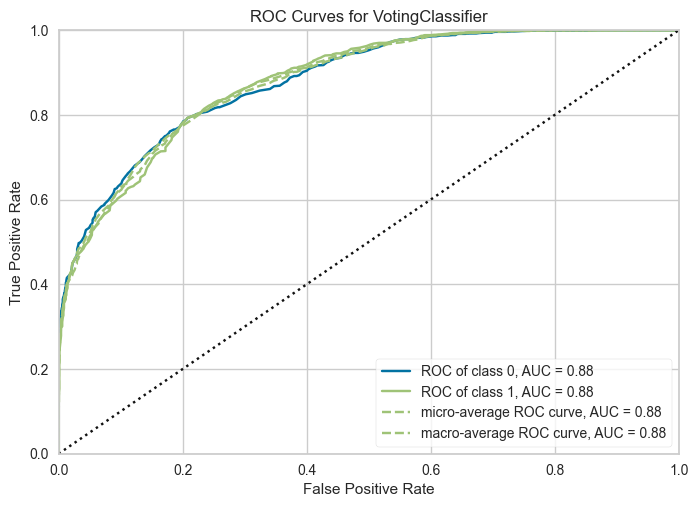

In [19]:
plot_model(blended1)

In [20]:
pred_holdout = predict_model(blended2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7894,0.8744,0.8566,0.7744,0.8134,0.5732,0.5770


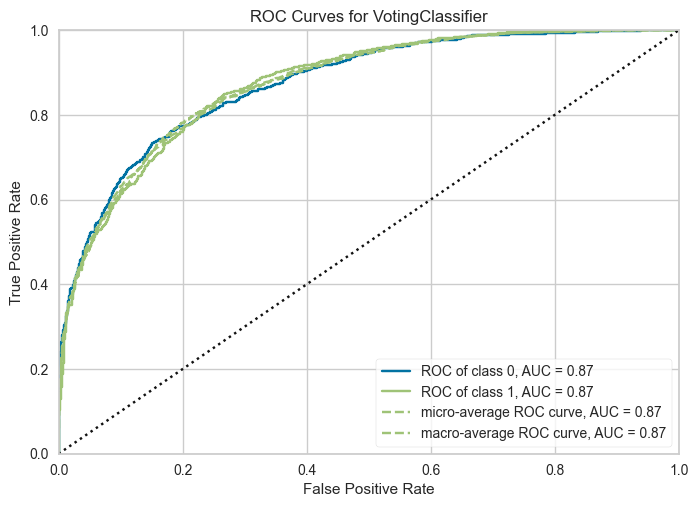

In [21]:
plot_model(blended2)

In [22]:
pred_holdout = predict_model(blended3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7854,0.8617,0.8582,0.7684,0.8108,0.5647,0.5693


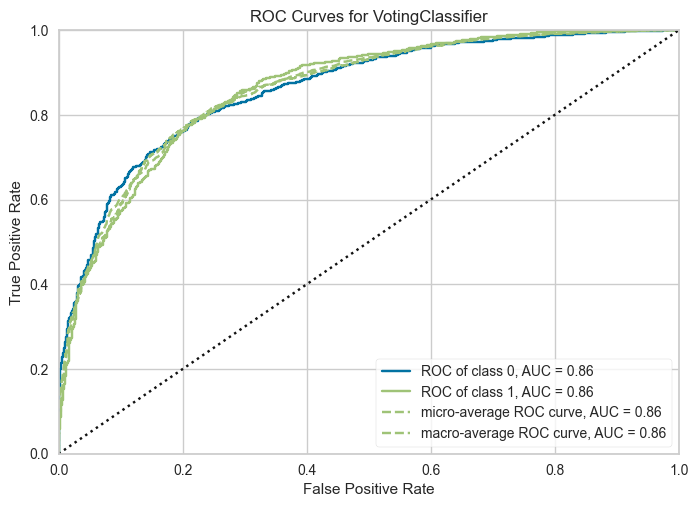

In [23]:
plot_model(blended3)

In [24]:
pred_holdout = predict_model(blended4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7876,0.8780,0.8607,0.7700,0.8128,0.5692,0.5739


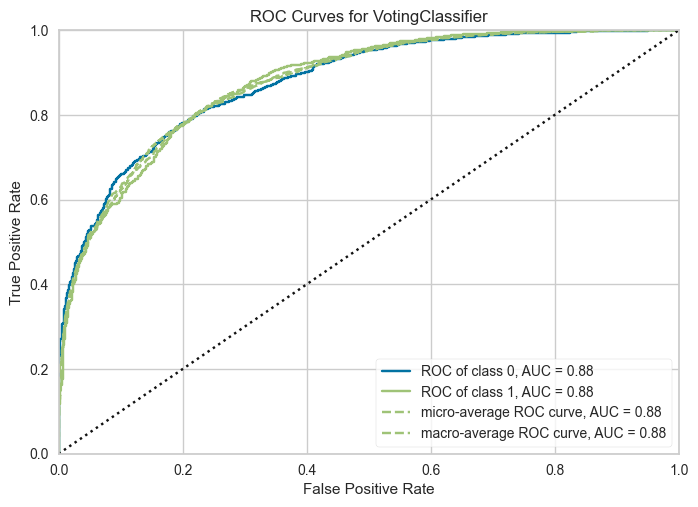

In [25]:
plot_model(blended4)

### 결과 저장

In [26]:
final_model = finalize_model(blended1)
predictions = predict_model(final_model, data = test)
predictions.loc[predictions['Label'] == 0, 'Score'] = 1 - predictions.loc[predictions['Label'] == 0, 'Score']
submission = pd.read_csv('./data/sample_submission.csv')
sub = predictions['Score']
submission['nerdiness'] = sub
submission.to_csv("./submit/submit17_1.csv", index = False)

In [ ]:
final_model = finalize_model(blended2)
predictions = predict_model(final_model, data = test)
predictions.loc[predictions['Label'] == 0, 'Score'] = 1 - predictions.loc[predictions['Label'] == 0, 'Score']
submission = pd.read_csv('./data/sample_submission.csv')
sub = predictions['Score']
submission['nerdiness'] = sub
submission.to_csv("./submit/submit17_2.csv", index = False)

In [ ]:
final_model = finalize_model(blended3)
predictions = predict_model(final_model, data = test)
predictions.loc[predictions['Label'] == 0, 'Score'] = 1 - predictions.loc[predictions['Label'] == 0, 'Score']
submission = pd.read_csv('./data/sample_submission.csv')
sub = predictions['Score']
submission['nerdiness'] = sub
submission.to_csv("./submit/submit17_3.csv", index = False)

In [ ]:
final_model = finalize_model(blended4)
predictions = predict_model(final_model, data = test)
predictions.loc[predictions['Label'] == 0, 'Score'] = 1 - predictions.loc[predictions['Label'] == 0, 'Score']
submission = pd.read_csv('./data/sample_submission.csv')
sub = predictions['Score']
submission['nerdiness'] = sub
submission.to_csv("./submit/submit17_4.csv", index = False)